In [1]:
import os
import re
import sys
import glob
import time
import uproot
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from scipy.signal import savgol_filter

from functools import partial

from matplotlib.colors import LogNorm

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import matplotlib

# Set Palatino as the serif font
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif']  = 'Palatino'

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"]      = 14

In [6]:
fav_col = '#418094'

## Analyze the hits of the available files

In [11]:
def extract_date_obj_and_number(filename):
    match       = re.search(r"(\d{2}_\d{2}_\d{4})-file_(\d+)", filename)
    date_str    = match.group(1)
    file_number = int(match.group(2))
    date_obj    = datetime.strptime(date_str, "%m_%d_%Y")
    return date_obj, file_number

def extract_date_and_number(filename):
    match = re.search(r"(\d{2}_\d{2}_\d{4})-file_(\d+)", filename)
    return match.group(1), int(match.group(2))

def adapt_evt_id(evt_id, fnum):
    return 1000000*fnum + np.array(evt_id)

normal_chs  = range(9)
trigger_chs = [9, 10, 11]

thr_ADC        = 80
sg_filt_window = 30
min_dist       = 25

evts_path    = '/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/'
filt_files   = glob.glob(evts_path + f'/BACoN_run4_hits_and_times_thr{thr_ADC}_mean_w{sg_filt_window}_dist{min_dist}_run*.npz')
sorted_files = sorted(filt_files, key=extract_date_obj_and_number)

In [9]:
sorted_files;

In [12]:
start_time = time.time()

filt_evts_dict   = {}
idx_max          = {}
height_sg        = {}
integ_sg         = {}
len_int_sg       = {}
idx_max_trigg    = {}
height_sg_trigg  = {}
integ_sg_trigg   = {}
len_int_sg_trigg = {}

print(len(sorted_files))
for ifile,filename in enumerate(sorted_files[:10]):
    print(filename)
    if ifile%20==0:
        print(ifile)
    d          = np.load(filename, allow_pickle=True)
    date, fnum = extract_date_and_number(filename)

    if date not in filt_evts_dict:
        print(date)
        filt_evts_dict[date] = {ch: d['filt_evts_dict']                  .item()[ch]  for ch in normal_chs}
        idx_max       [date] = {ch: np.concatenate(d['idx_peaks_max']    .item()[ch]) for ch in normal_chs}
        height_sg     [date] = {ch: np.concatenate(d['height_peaks_sg']  .item()[ch]) for ch in normal_chs}
        integ_sg      [date] = {ch: np.concatenate(d['integral_peaks_sg'].item()[ch]) for ch in normal_chs}
        len_int_sg    [date] = {ch: np.concatenate(d['len_peaks_sg']     .item()[ch]) for ch in normal_chs}
    else:
        for ch in normal_chs:
            try:
                filt_evts_dict[date][ch] = np.concatenate((filt_evts_dict[date][ch], adapt_evt_id(d['filt_evts_dict'].item()[ch], fnum)))
                idx_max       [date][ch] = np.concatenate((idx_max       [date][ch], np.concatenate(d['idx_peaks_max']    .item()[ch])))
                height_sg     [date][ch] = np.concatenate((height_sg     [date][ch], np.concatenate(d['height_peaks_sg']  .item()[ch])))
                integ_sg      [date][ch] = np.concatenate((integ_sg      [date][ch], np.concatenate(d['integral_peaks_sg'].item()[ch])))
                len_int_sg    [date][ch] = np.concatenate((len_int_sg    [date][ch], np.concatenate(d['len_peaks_sg']     .item()[ch])))
            except Exception as e:
                print(date, fnum, filename, ch, str(e))
                continue

    if date not in idx_max_trigg:
        print(date)
        idx_max_trigg   [date] = {ch: np.concatenate(d['idx_peaks_max_trigg']    .item()[ch]) for ch in trigger_chs}
        height_sg_trigg [date] = {ch: np.concatenate(d['height_peaks_sg_trigg']  .item()[ch]) for ch in trigger_chs}
        integ_sg_trigg  [date] = {ch: np.concatenate(d['integral_peaks_sg_trigg'].item()[ch]) for ch in trigger_chs}
        len_int_sg_trigg[date] = {ch: np.concatenate(d['len_peaks_sg_trigg']     .item()[ch]) for ch in trigger_chs}
    else:
        for ch in trigger_chs:
            try:
                idx_max_trigg   [date][ch] = np.concatenate((idx_max_trigg   [date][ch], np.concatenate(d['idx_peaks_max_trigg']    .item()[ch])))
                height_sg_trigg [date][ch] = np.concatenate((height_sg_trigg [date][ch], np.concatenate(d['height_peaks_sg_trigg']  .item()[ch])))
                integ_sg_trigg  [date][ch] = np.concatenate((integ_sg_trigg  [date][ch], np.concatenate(d['integral_peaks_sg_trigg'].item()[ch])))
                len_int_sg_trigg[date][ch] = np.concatenate((len_int_sg_trigg[date][ch], np.concatenate(d['len_peaks_sg_trigg']     .item()[ch])))
            except Exception as e:
                print(date, fnum, filename, ch, str(e))
                continue
                
end_time     = time.time()                
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} s, {elapsed_time/60} min")

38
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_0.npz
0
05_19_2025
05_19_2025
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_1.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_2.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_3.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_4.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_5.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_6.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_r

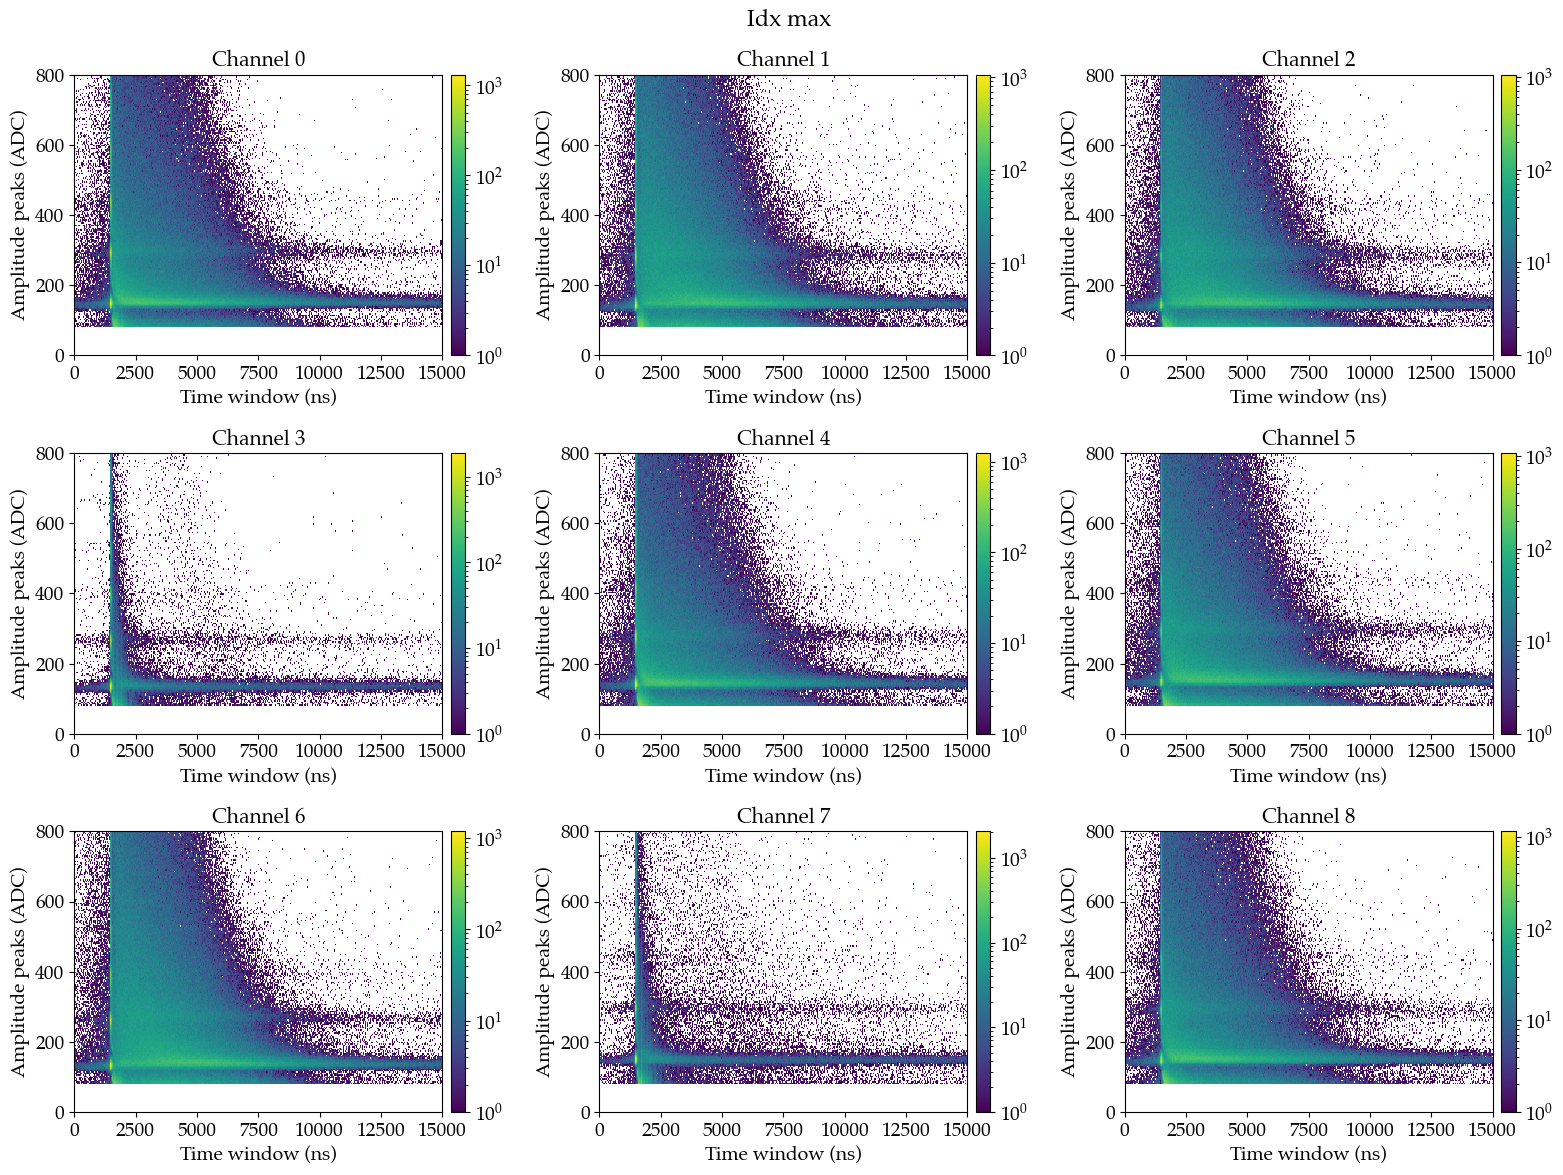

In [13]:
sel_dates = idx_max.keys()
fig, axs  = plt.subplots(3, 3, figsize=(16, 12))
for ch in normal_chs:
    i = int(ch/3)
    j = ch%3
    
    try:
        ch_idxs = np.concatenate([idx_max  [date][ch] for date in sel_dates])
        ch_vals = np.concatenate([height_sg[date][ch] for date in sel_dates])
    
        fig0 = axs[i][j].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 800)), cmin=1, norm=LogNorm())
        axs[i][j].set_xlabel('Time window (ns)',      fontsize=14)
        axs[i][j].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
        axs[i][j].set_title(f"Channel {ch}",          fontsize=15)
        fig.colorbar(fig0[3], ax=axs[i][j], pad=0.02)
    except Exception as e:
        print(e)
        continue
plt.suptitle('Idx max')
plt.tight_layout()
plt.show()

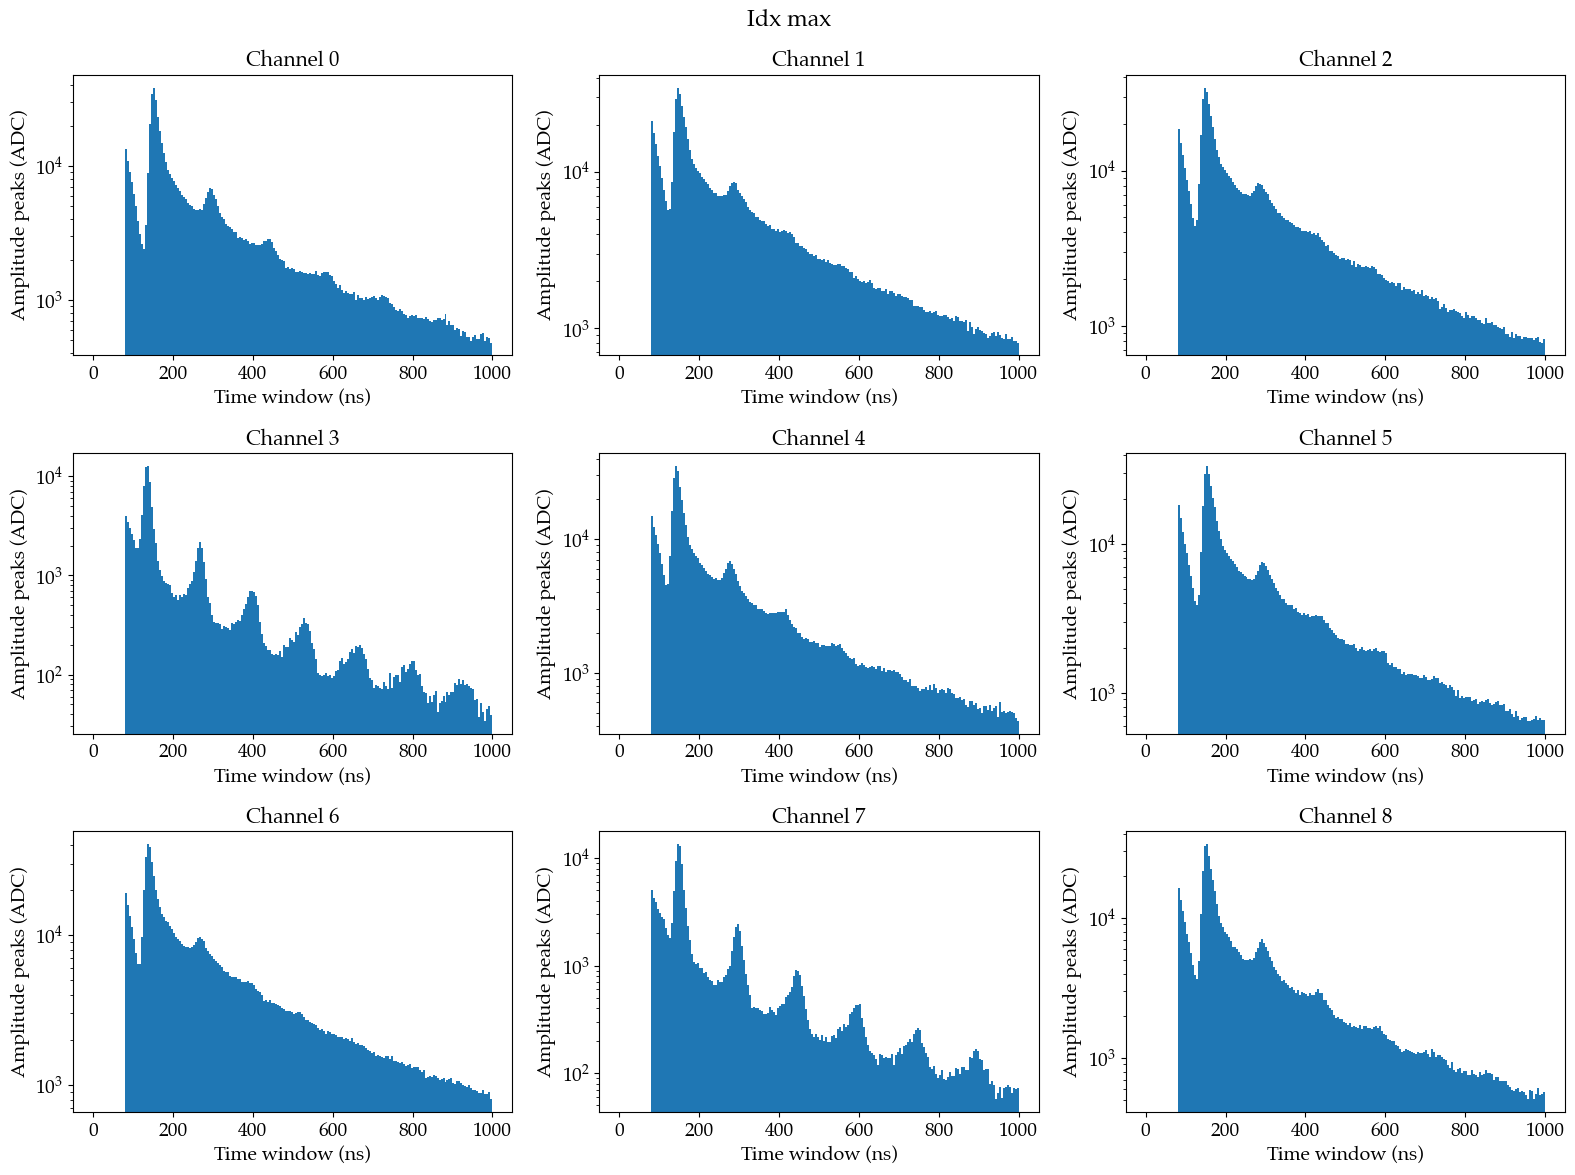

In [14]:
sel_dates = idx_max.keys()
fig, axs  = plt.subplots(3, 3, figsize=(16, 12))
for ch in normal_chs:
    i = int(ch/3)
    j = ch%3
    try:
        ch_vals = np.concatenate([height_sg[date][ch] for date in sel_dates])
        axs[i][j].hist(ch_vals, bins=200, range=(0, 1000), log=True)
        axs[i][j].set_xlabel('Time window (ns)',      fontsize=14)
        axs[i][j].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
        axs[i][j].set_title(f"Channel {ch}",          fontsize=15)
    except Exception as e:
        print(e)
        continue
plt.suptitle('Idx max')
plt.tight_layout()
plt.show()

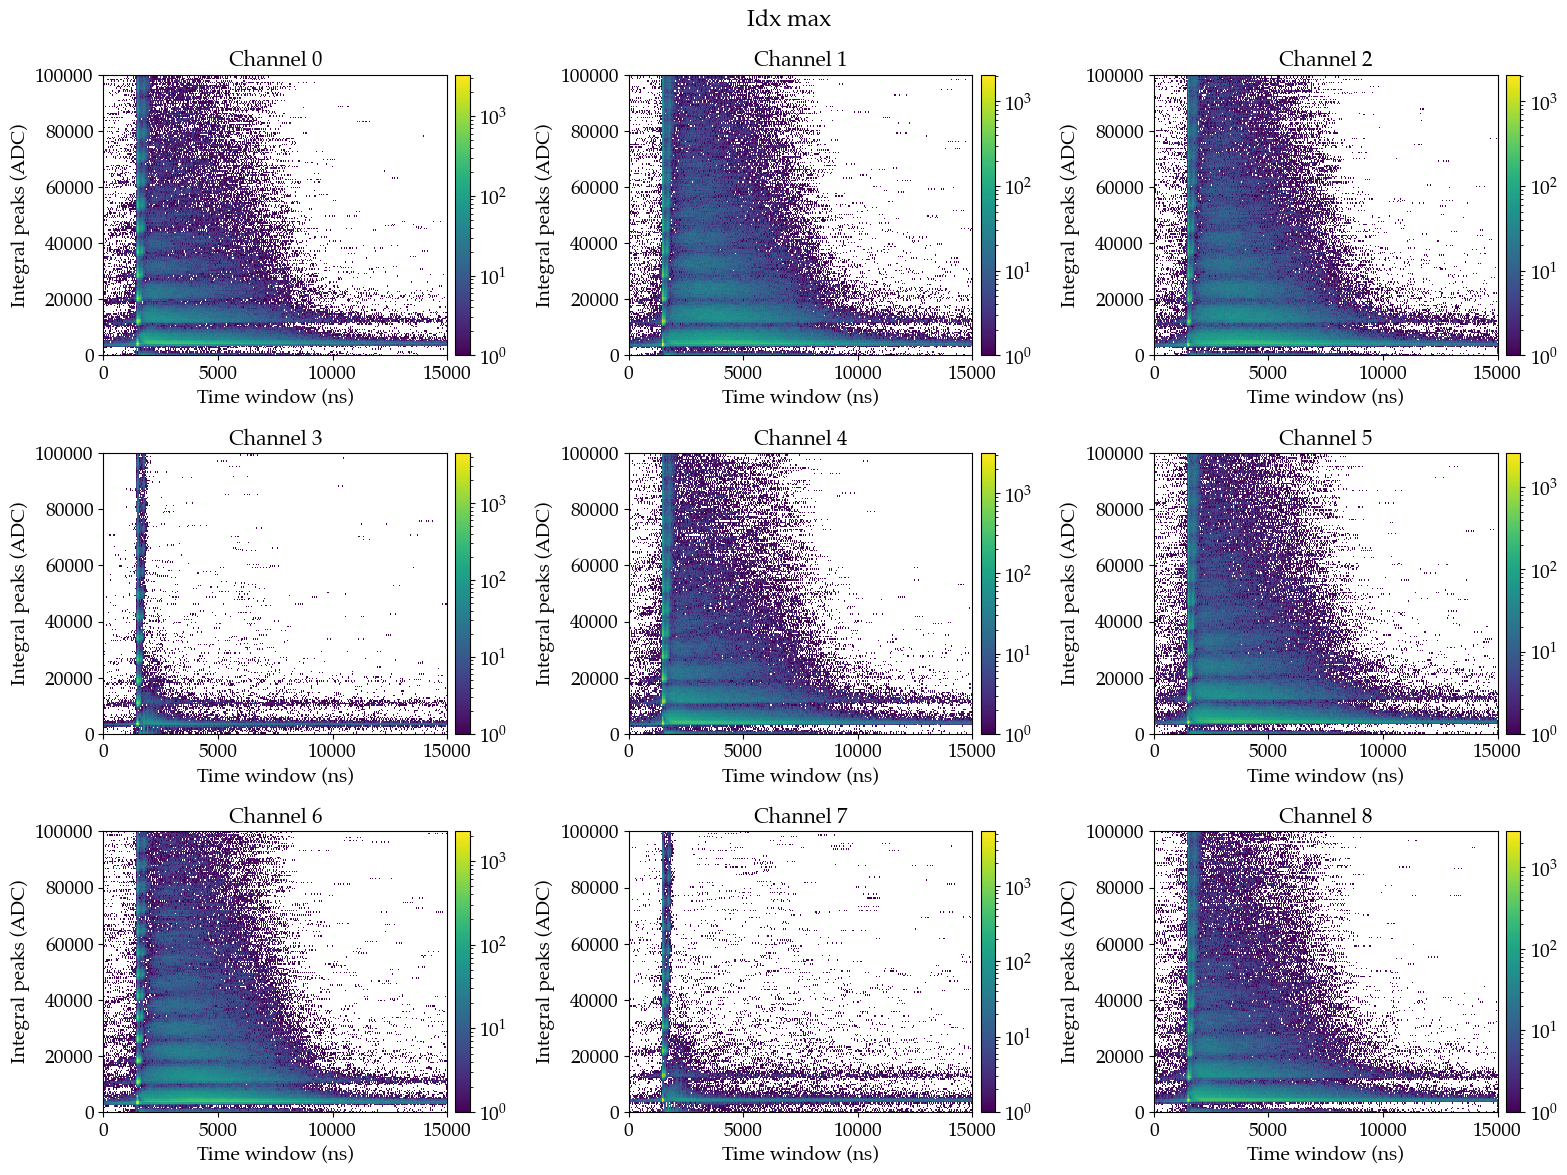

In [16]:
sel_dates = idx_max.keys()
fig, axs  = plt.subplots(3, 3, figsize=(16, 12))
for ch in normal_chs:
    i = int(ch/3)
    j = ch%3
    try:
        ch_idxs = np.concatenate([idx_max [date][ch] for date in sel_dates])
        ch_vals = np.concatenate([integ_sg[date][ch] for date in sel_dates])
    
        fig0 = axs[i][j].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 100000)), cmin=1, norm=LogNorm())
        axs[i][j].set_xlabel('Time window (ns)',     fontsize=14)
        axs[i][j].set_ylabel('Integral peaks (ADC)', fontsize=14)
        axs[i][j].set_title(f"Channel {ch}",         fontsize=15)
        fig.colorbar(fig0[3], ax=axs[i][j], pad=0.02)
    except Exception as e:
        print(e)
        continue
plt.suptitle('Idx max')
plt.tight_layout()
plt.show()

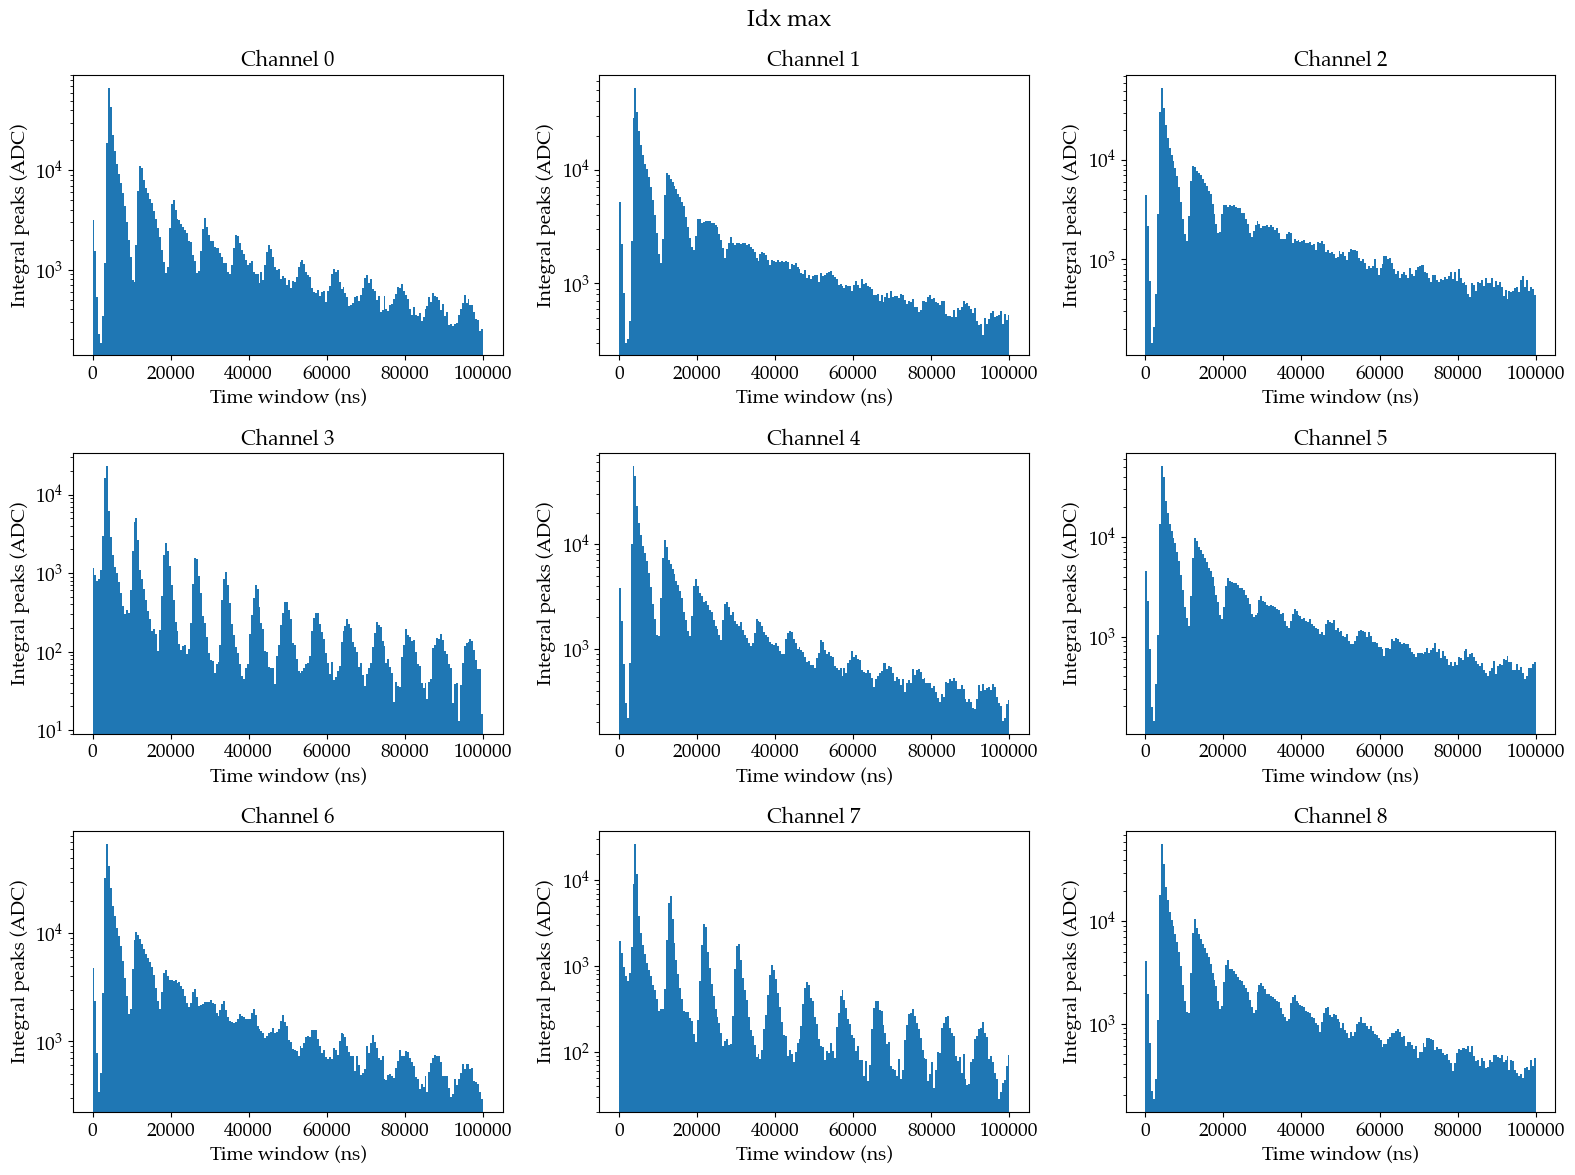

In [17]:
sel_dates = idx_max.keys()
fig, axs  = plt.subplots(3, 3, figsize=(16, 12))
for ch in normal_chs:
    i = int(ch/3)
    j = ch%3
    try:
        ch_vals = np.concatenate([integ_sg[date][ch] for date in sel_dates])
        axs[i][j].hist(ch_vals, bins=200, range=(0, 100000), log=True)
        axs[i][j].set_xlabel('Time window (ns)',     fontsize=14)
        axs[i][j].set_ylabel('Integral peaks (ADC)', fontsize=14)
        axs[i][j].set_title(f"Channel {ch}",         fontsize=15)
    except Exception as e:
        print(e)
        continue
plt.suptitle('Idx max')
plt.tight_layout()
plt.show()

## Trigger channels

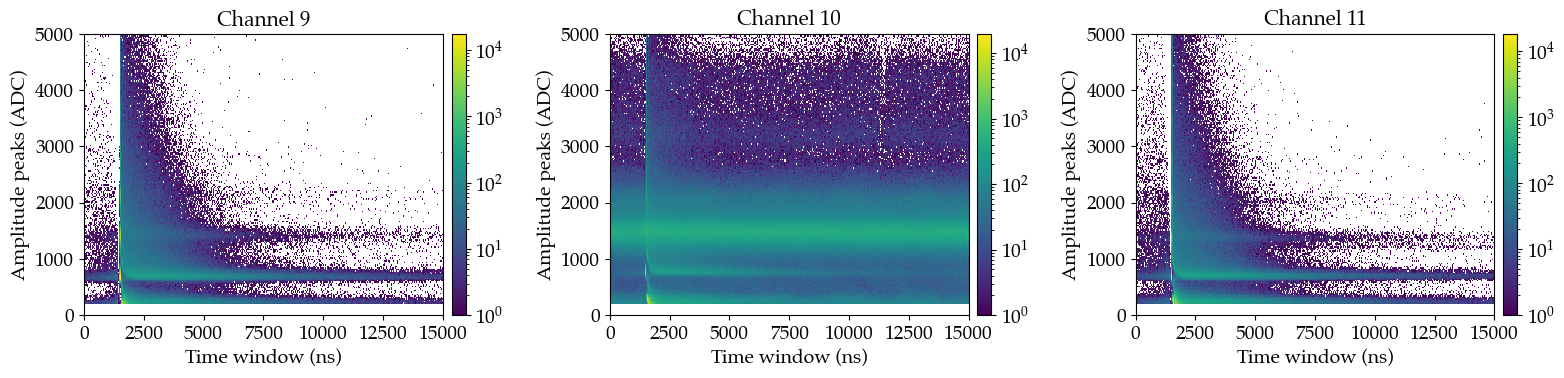

In [18]:
sel_dates = idx_max_trigg.keys()
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i,ch in enumerate(trigger_chs):
    try:
        ch_idxs = np.concatenate([idx_max_trigg  [date][ch] for date in sel_dates])
        ch_vals = np.concatenate([height_sg_trigg[date][ch] for date in sel_dates])
    
        fig0 = axs[i].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 5000)), cmin=1, norm=LogNorm())
        axs[i].set_xlabel('Time window (ns)',      fontsize=14)
        axs[i].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
        axs[i].set_title(f"Channel {ch}",          fontsize=15)
        fig.colorbar(fig0[3], ax=axs[i], pad=0.02)
    except Exception as e:
        print(e)
        continue
#plt.suptitle(f'File {filename.split("/")[-1]}')
plt.tight_layout()
plt.show()

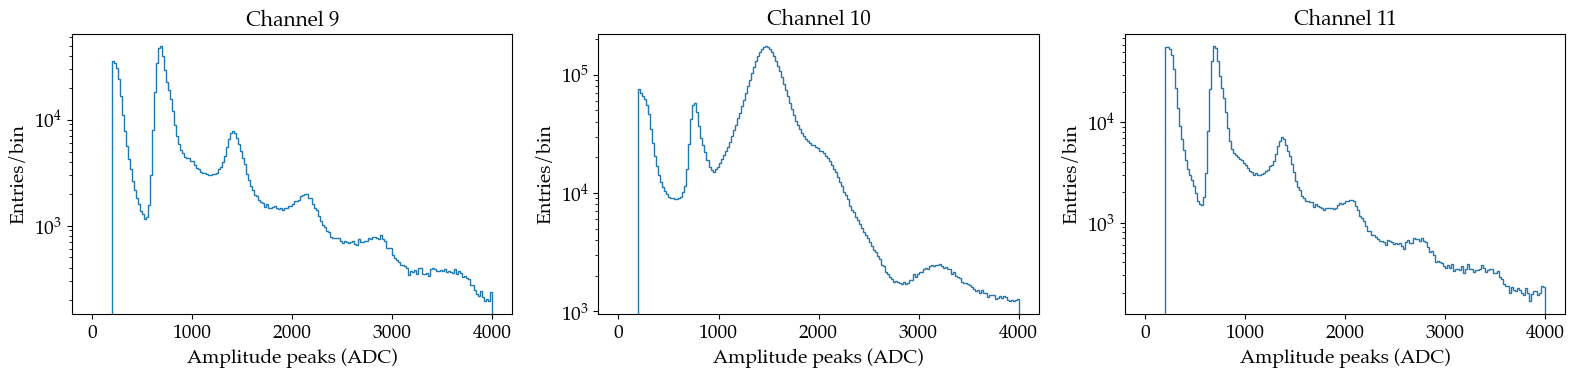

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ch in [9, 10, 11]:
    j = ch%3
    ch_vals = np.concatenate([height_sg_trigg[date][ch] for date in sel_dates])
    axs[j].hist(ch_vals, 200, range=(0, 4000), histtype='step')
    axs[j].set_ylabel('Entries/bin',           fontsize=14)
    axs[j].set_xlabel('Amplitude peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {ch}",          fontsize=15)
    axs[j].set_yscale('log')
plt.tight_layout()
plt.show()

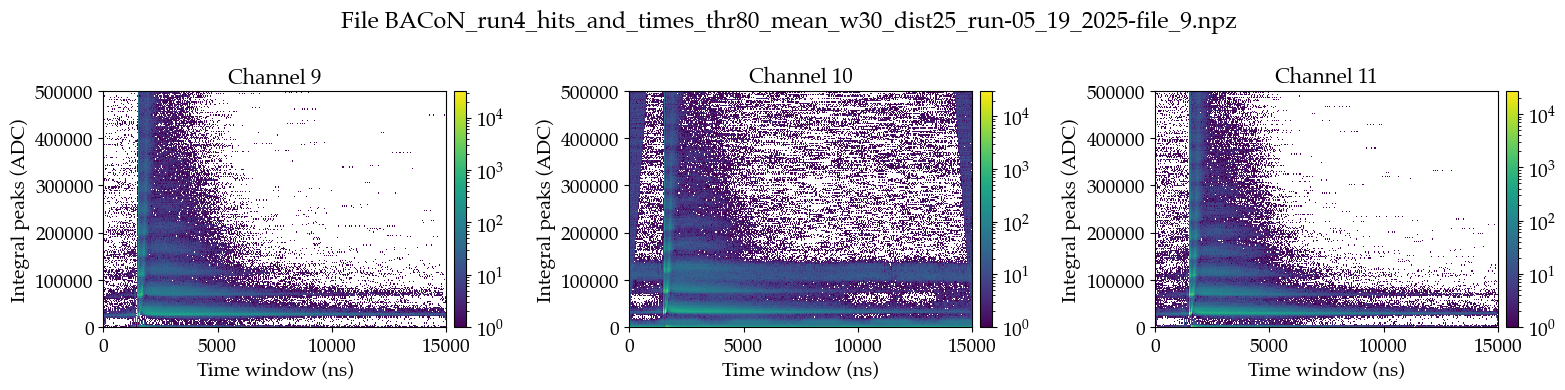

In [20]:
sel_dates = idx_max_trigg.keys()
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i,ch in enumerate(trigger_chs):
    try:
        ch_idxs = np.concatenate([idx_max_trigg [date][ch] for date in sel_dates])
        ch_vals = np.concatenate([integ_sg_trigg[date][ch] for date in sel_dates])
    
        fig0 = axs[i].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 500000)), cmin=1, norm=LogNorm())
        axs[i].set_xlabel('Time window (ns)',      fontsize=14)
        axs[i].set_ylabel('Integral peaks (ADC)', fontsize=14)
        axs[i].set_title(f"Channel {ch}",          fontsize=15)
        fig.colorbar(fig0[3], ax=axs[i], pad=0.02)
    except Exception as e:
        print(e)
        continue
plt.suptitle(f'File {filename.split("/")[-1]}')
plt.tight_layout()
plt.show()

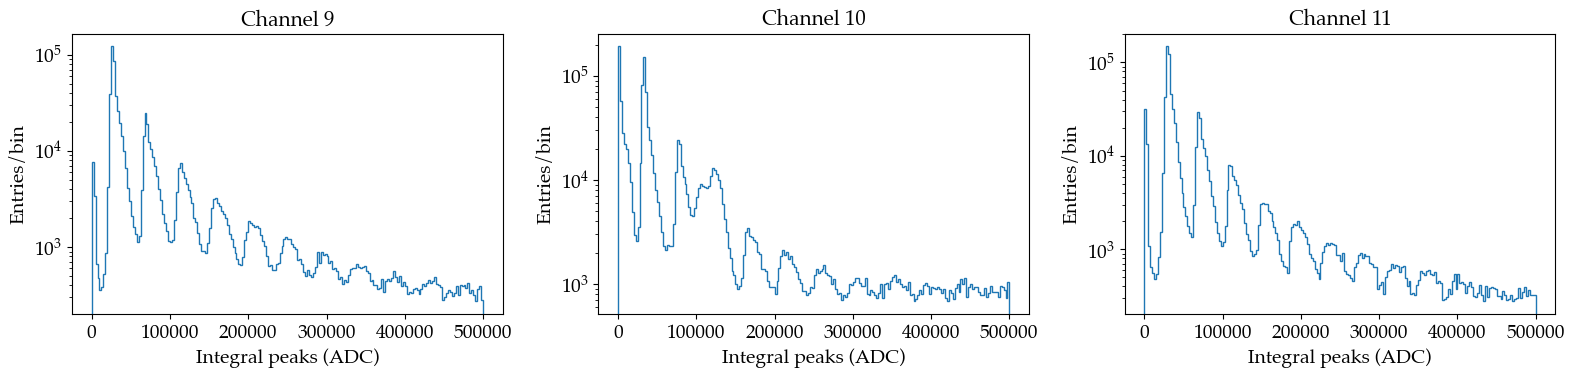

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ch in [9, 10, 11]:
    j = ch%3
    ch_vals = np.concatenate([integ_sg_trigg[date][ch] for date in sel_dates])
    axs[j].hist(ch_vals, 200, range=(0,500000), histtype='step', log=True)
    axs[j].set_ylabel('Entries/bin',          fontsize=14)
    axs[j].set_xlabel('Integral peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {ch}",         fontsize=15)
    axs[j].set_yscale('log')
plt.tight_layout()
plt.show()

## I'm going to reject events with more than 10 peaks in the trogger channels because channel 10 has some strange noise in a couple of files

In [22]:
start_time = time.time()

idx_max_trigg2   = {}
height_sg_trigg2 = {}
integ_sg_trigg2  = {}
num_evts_trigg2  = {}

print(len(sorted_files))
for ifile,filename in enumerate(sorted_files[:10]):
    print(filename)
    if ifile%20==0:
        print(ifile)
    d          = np.load(filename, allow_pickle=True)
    date, fnum = extract_date_and_number(filename)
    
    for ch in trigger_chs:
        idx_after_cut    = []
        height_after_cut = []
        integ_after_cut  = []
        num_evts         = 0
        idx_peaks_ch     = d['idx_peaks_max_trigg']    .item()[ch]
        height_peaks_ch  = d['height_peaks_sg_trigg']  .item()[ch]
        integ_peaks_ch   = d['integral_peaks_sg_trigg'].item()[ch]
        
        for ievt, (idxs, vals1, vals2) in enumerate(zip(idx_peaks_ch, height_peaks_ch, integ_peaks_ch)):
            if len(idxs)==0 or len(idxs)>10:
                continue
            else:
                idx_after_cut   .append(idxs)
                height_after_cut.append(vals1)
                integ_after_cut .append(vals2)
                num_evts += 1
                
        if date not in idx_max_trigg2:
            print(date)
            idx_max_trigg2  [date] = {}
            height_sg_trigg2[date] = {}
            integ_sg_trigg2 [date] = {}
            num_evts_trigg2 [date] = {}

        if ch not in idx_max_trigg2[date]:
            idx_max_trigg2  [date][ch] = np.concatenate(idx_after_cut)
            height_sg_trigg2[date][ch] = np.concatenate(height_after_cut)
            integ_sg_trigg2 [date][ch] = np.concatenate(integ_after_cut)
            num_evts_trigg2 [date][ch] = np.array([num_evts])
        else:
            idx_max_trigg2  [date][ch] = np.concatenate((idx_max_trigg2  [date][ch], np.concatenate(idx_after_cut)))
            height_sg_trigg2[date][ch] = np.concatenate((height_sg_trigg2[date][ch], np.concatenate(height_after_cut)))
            integ_sg_trigg2 [date][ch] = np.concatenate((integ_sg_trigg2 [date][ch], np.concatenate(integ_after_cut)))
            num_evts_trigg2 [date][ch] = np.concatenate((num_evts_trigg2 [date][ch], np.array([num_evts])))
                
end_time     = time.time()                
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} s, {elapsed_time/60} min")

38
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_0.npz
0
05_19_2025
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_1.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_2.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_3.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_4.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_5.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_and_times_thr80_mean_w30_dist25_run-05_19_2025-file_6.npz
/Users/romoluque_c/LEGEND/BACON/new_setup_run4/data_npz/BACoN_run4_hits_an

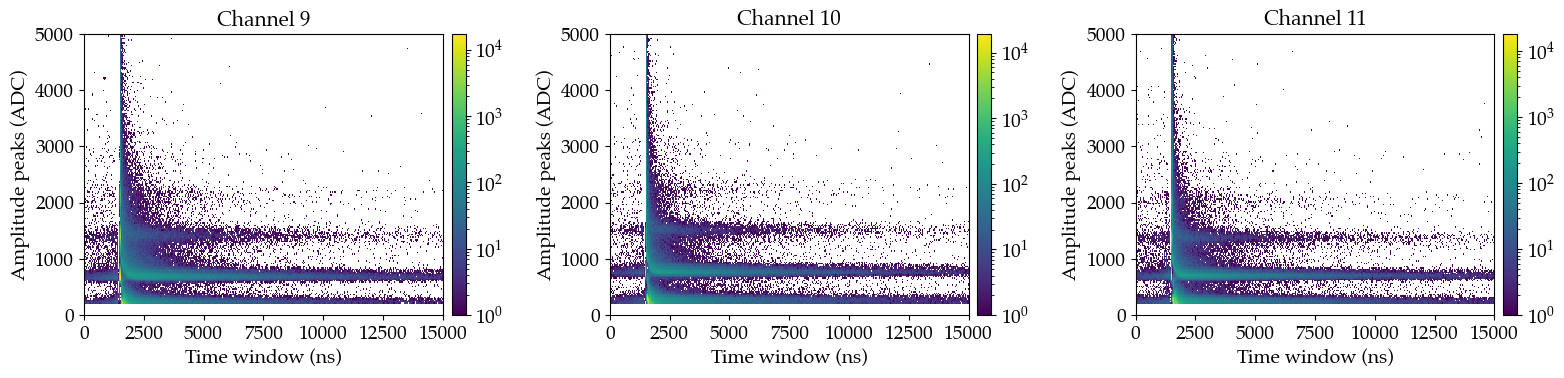

In [23]:
sel_dates = idx_max_trigg.keys()
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i,ch in enumerate(trigger_chs):
    try:
        ch_idxs = np.concatenate([idx_max_trigg2  [date][ch] for date in sel_dates])
        ch_vals = np.concatenate([height_sg_trigg2[date][ch] for date in sel_dates])
    
        fig0 = axs[i].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 5000)), cmin=1, norm=LogNorm())
        axs[i].set_xlabel('Time window (ns)',      fontsize=14)
        axs[i].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
        axs[i].set_title(f"Channel {ch}",          fontsize=15)
        fig.colorbar(fig0[3], ax=axs[i], pad=0.02)
    except Exception as e:
        print(e)
        continue
#plt.suptitle(f'File {filename.split("/")[-1]}')
plt.tight_layout()
plt.show()

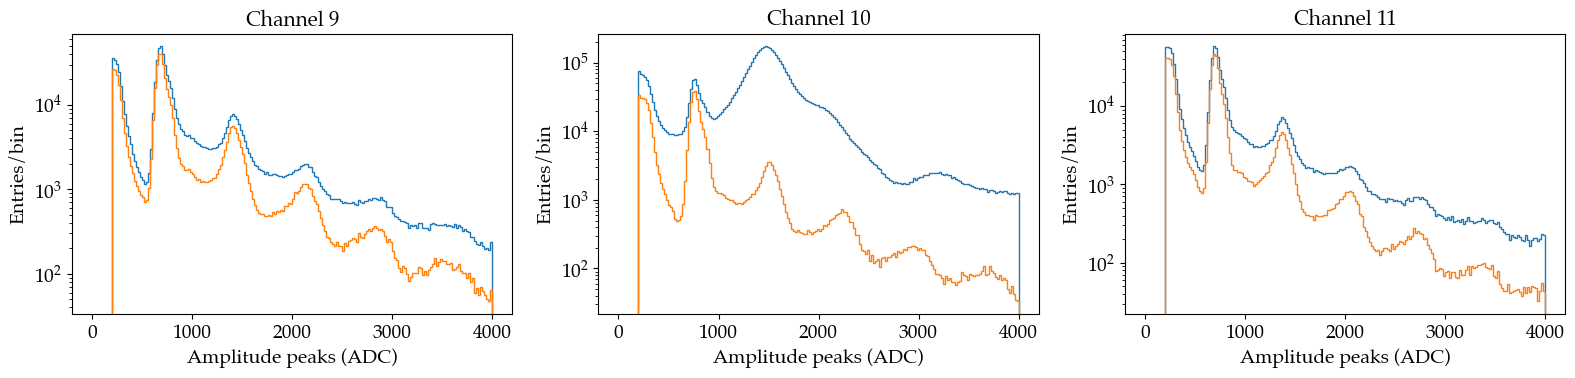

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ch in [9, 10, 11]:
    j = ch%3
    ch_vals1 = np.concatenate([height_sg_trigg [date][ch] for date in sel_dates])
    ch_vals2 = np.concatenate([height_sg_trigg2[date][ch] for date in sel_dates])
    axs[j].hist(ch_vals1, 200, range=(0, 4000), histtype='step', label='all peaks')
    axs[j].hist(ch_vals2, 200, range=(0, 4000), histtype='step', label='less than 10 peaks')
    axs[j].set_ylabel('Entries/bin',           fontsize=14)
    axs[j].set_xlabel('Amplitude peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {ch}",          fontsize=15)
    axs[j].set_yscale('log')
plt.tight_layout()
plt.show()

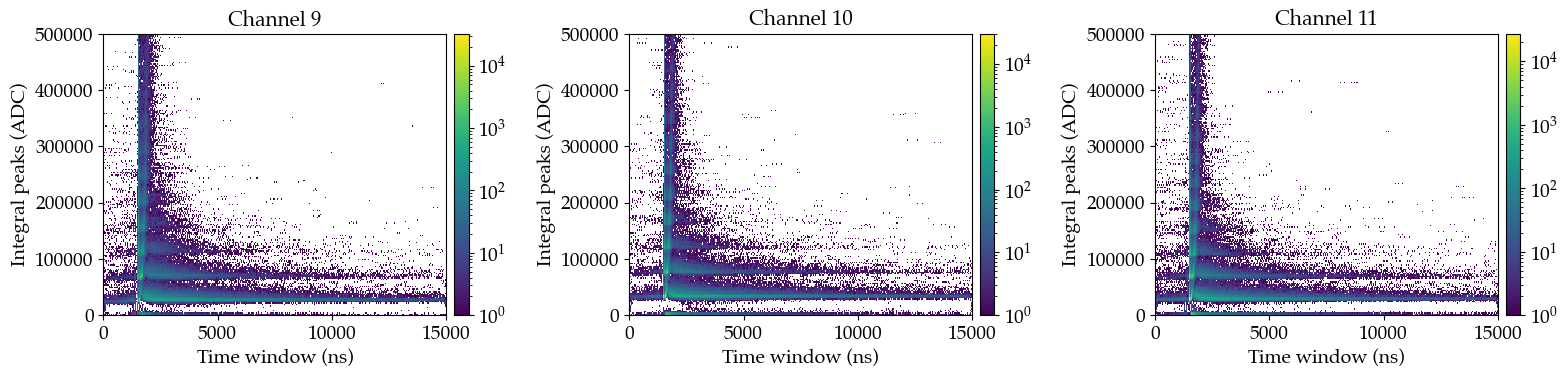

In [25]:
sel_dates = idx_max_trigg.keys()
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i,ch in enumerate(trigger_chs):
    try:
        ch_idxs = np.concatenate([idx_max_trigg2 [date][ch] for date in sel_dates])
        ch_vals = np.concatenate([integ_sg_trigg2[date][ch] for date in sel_dates])
    
        fig0 = axs[i].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 500000)), cmin=1, norm=LogNorm())
        axs[i].set_xlabel('Time window (ns)',     fontsize=14)
        axs[i].set_ylabel('Integral peaks (ADC)', fontsize=14)
        axs[i].set_title(f"Channel {ch}",         fontsize=15)
        fig.colorbar(fig0[3], ax=axs[i], pad=0.02)
    except Exception as e:
        print(e)
        continue
plt.tight_layout()
plt.show()

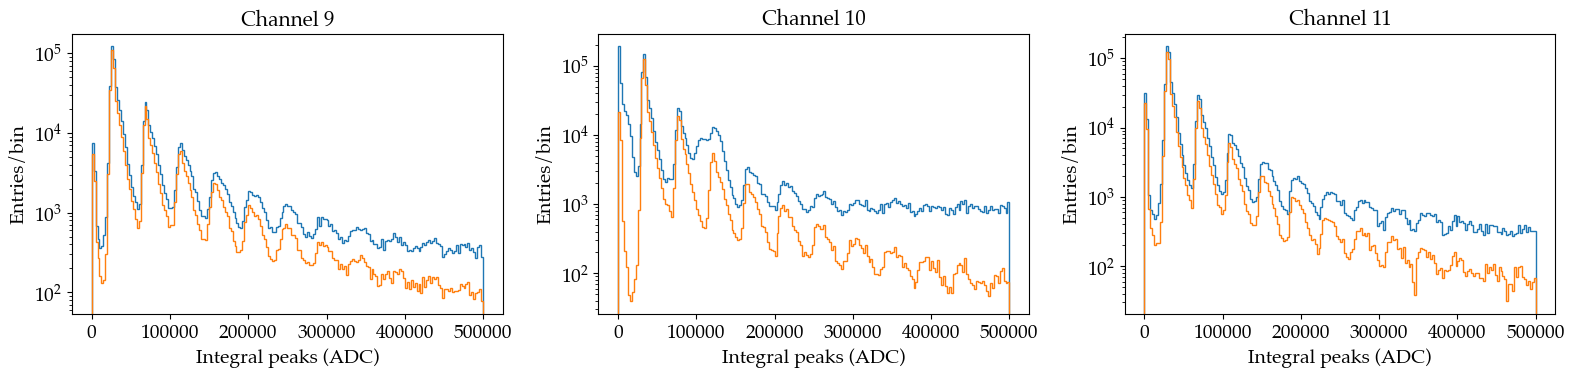

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ch in [9, 10, 11]:
    j = ch%3
    ch_vals1 = np.concatenate([integ_sg_trigg [date][ch] for date in sel_dates])
    ch_vals2 = np.concatenate([integ_sg_trigg2[date][ch] for date in sel_dates])
    axs[j].hist(ch_vals1, 200, range=(0, 500000), histtype='step', label='all peaks')
    axs[j].hist(ch_vals2, 200, range=(0, 500000), histtype='step', label='less than 10 peaks')
    axs[j].set_ylabel('Entries/bin',          fontsize=14)
    axs[j].set_xlabel('Integral peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {ch}",         fontsize=15)
    axs[j].set_yscale('log')
plt.tight_layout()
plt.show()

## Time distribution:

### All events

In [27]:
def get_t_dist_from_hit_map(timestamps, amplitudes, bin_size=None):
    #bin_size is in time samples. bins_size=20 would be 40 ns
    unique_tmstmp = np.unique(timestamps)
    sum_ampl      = np.array([np.sum(amplitudes[timestamps == timestamp]) for timestamp in unique_tmstmp])
    if bin_size:
        reshaped = sum_ampl[:len(sum_ampl) - len(sum_ampl) % bin_size].reshape(-1, bin_size)
        sum_ampl   = reshaped.sum(axis=1)
        return bin_size*np.arange(len(sum_ampl)), sum_ampl
    else:
        return unique_tmstmp, sum_ampl

In [28]:
sel_dates = idx_max.keys()
uniq_ts   = {}
sum_ampls = {}
for ch in normal_chs:
    print(ch)
    uniq_ts_ch, sum_ampls_ch = get_t_dist_from_hit_map(2*np.concatenate([idx_max  [date][ch] for date in sel_dates]),
                                                         np.concatenate([height_sg[date][ch] for date in sel_dates]))
    uniq_ts  [ch] = uniq_ts_ch
    sum_ampls[ch] = sum_ampls_ch

0
1
2
3
4
5
6
7
8


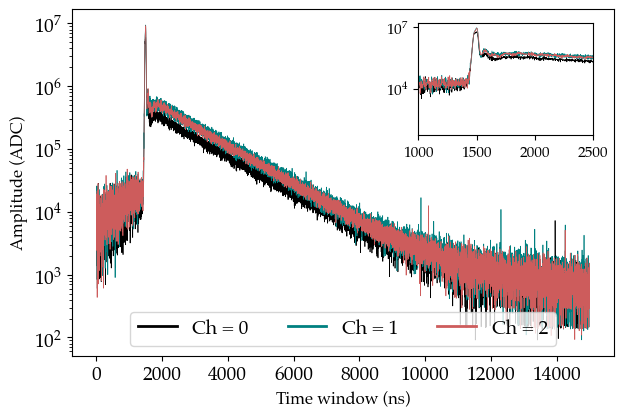

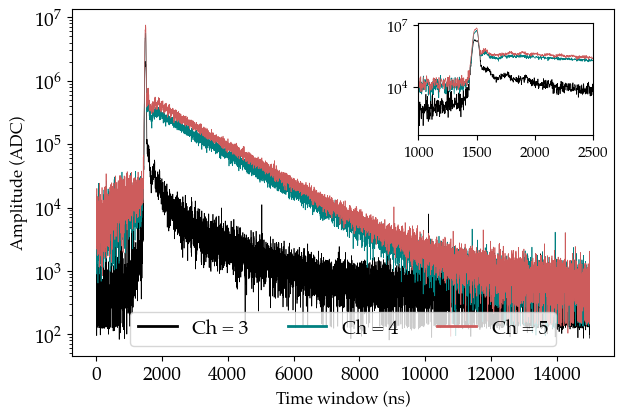

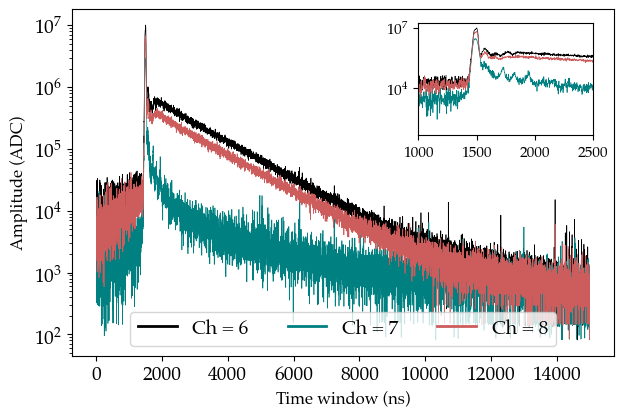

In [29]:
for sel_chs in [[0,1,2], [3,4,5], [6,7,8]]:
    fig = plt.figure(figsize=(7, 4.5))
    for ch, col in zip(sel_chs, ['k', 'teal', 'indianred']):
        unique_tstamps, sum_ampl = uniq_ts[ch], sum_ampls[ch]
        plt.plot(unique_tstamps, sum_ampl, lw=0.5, c=col, label=f'Ch = {ch}')
    
    plt.xlabel('Time window (ns)', fontsize=12)
    plt.ylabel('Amplitude (ADC)',  fontsize=12)
    plt.yscale('log')
    #plt.ylim(8e3, 1e6)
    leg = plt.legend(loc='lower center', ncol=3)
    for line in leg.get_lines():
        line.set_linewidth(2)

    # Inset plot
    ax_inset = fig.add_axes([0.62, 0.60, 0.25, 0.25])
    for ch, col in zip(sel_chs, ['k', 'teal', 'indianred']):
        unique_tstamps, sum_ampl = uniq_ts[ch], sum_ampls[ch]
        ax_inset.plot(unique_tstamps, sum_ampl, c=col, lw=0.5)

    ax_inset.set_xlim(1000, 2500)
    #ax_inset.set_ylim(8e3, 1e6)
    ax_inset.tick_params(axis='x', labelsize=11)
    ax_inset.tick_params(axis='y', labelsize=11)
    ax_inset.set_yscale('log')
    plt.show()

## Fit dists

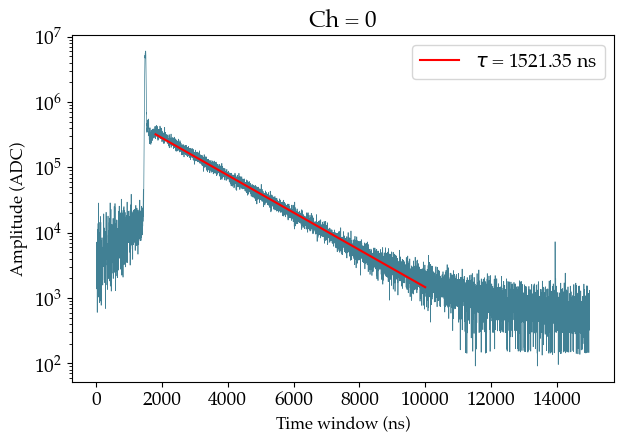

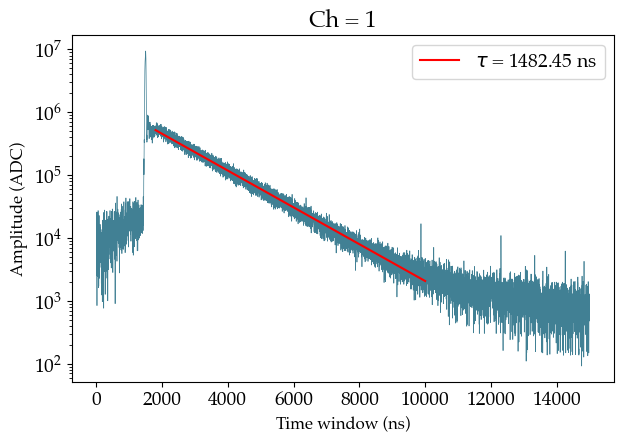

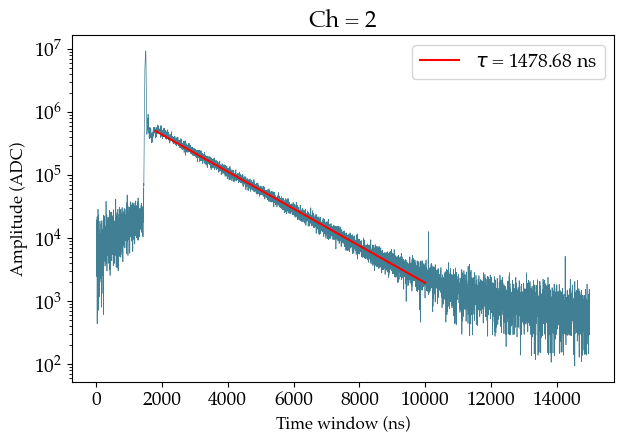

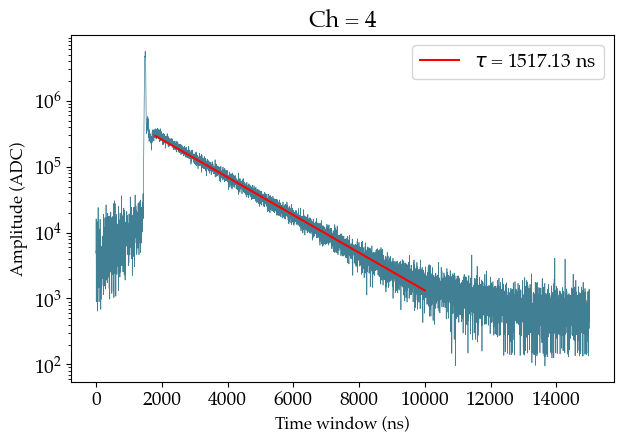

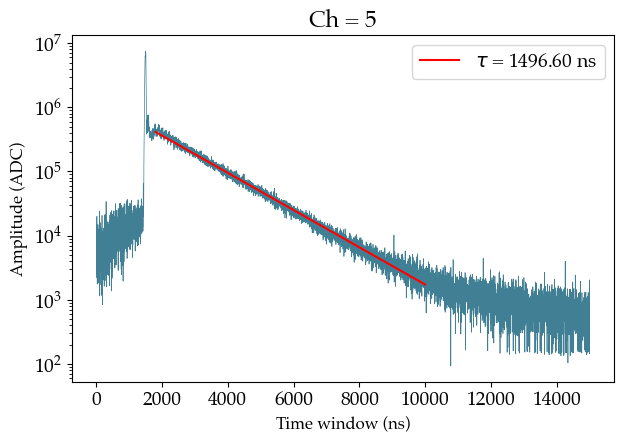

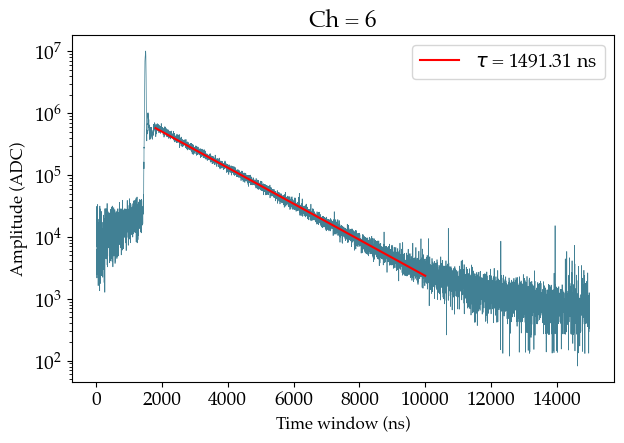

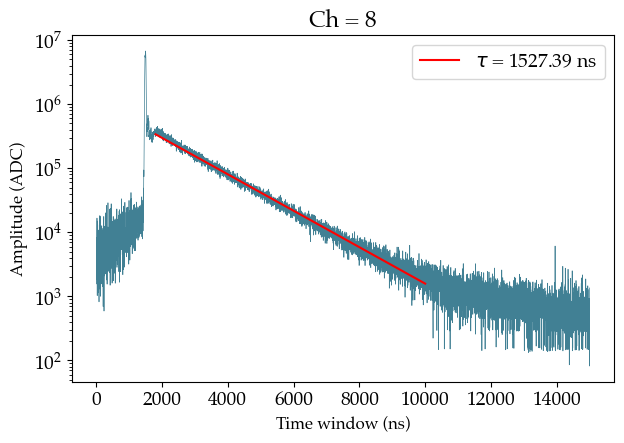

In [30]:
from scipy.stats import linregress

all_decay_const = {}

for ch in normal_chs:
    if ch in [3, 7]:
        continue
    unique_tstamps, sum_ampl = uniq_ts[ch], sum_ampls[ch]
    sel_rng      = (unique_tstamps > 1800) & (unique_tstamps < 10000)
    sum_ampl_log = np.log(sum_ampl)
    slope, intercept, _, _, _ = linregress(unique_tstamps[sel_rng], sum_ampl_log[sel_rng])
    tau = -1 / slope
    
    fig = plt.figure(figsize=(7, 4.5))
    plt.plot(unique_tstamps, sum_ampl, lw=0.5, c=fav_col)
    plt.semilogy(unique_tstamps[sel_rng], np.exp(intercept + slope * unique_tstamps[sel_rng]), label=rf'$\tau$ = {tau:.2f} ns', c='r')
    plt.title(f'Ch = {ch}')
    plt.xlabel('Time window (ns)', fontsize=12)
    plt.ylabel('Amplitude (ADC)',  fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    all_decay_const[ch] = tau

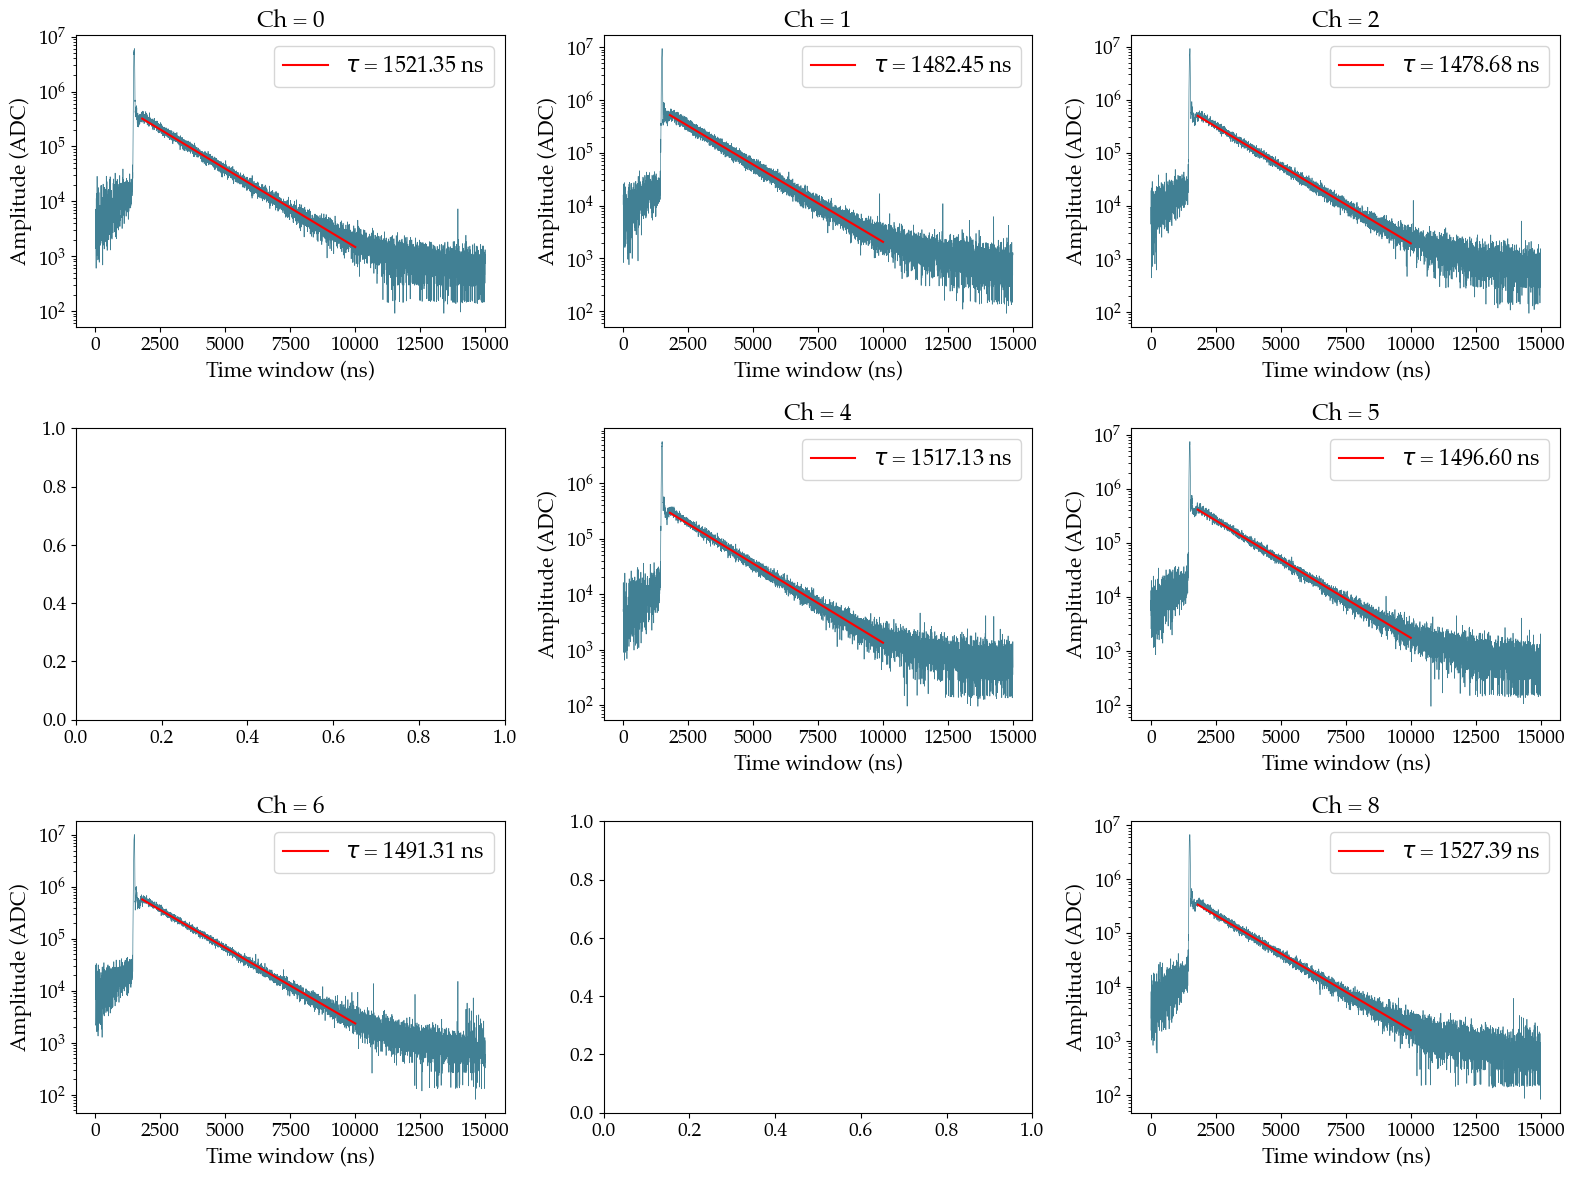

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for ch in normal_chs:
    i = int(ch/3)
    j = ch%3
    
    rngs  = (1800, 10000)
    
    if ch in [3, 7]:
        continue

    unique_tstamps, sum_ampl = uniq_ts[ch], sum_ampls[ch]
    sel_rng      = (unique_tstamps > rngs[0]) & (unique_tstamps < rngs[1])
    sum_ampl_log = np.log(sum_ampl)
    slope, intercept, _, _, _ = linregress(unique_tstamps[sel_rng], sum_ampl_log[sel_rng])
    tau = -1 / slope
    
    axs[i][j].plot(unique_tstamps, sum_ampl, lw=0.5, c=fav_col)
    axs[i][j].semilogy(unique_tstamps[sel_rng], np.exp(intercept + slope * unique_tstamps[sel_rng]), c='r', label=rf'$\tau$ = {tau:.2f} ns')
    axs[i][j].set_title(f'Ch = {ch}')
    axs[i][j].set_xlabel('Time window (ns)', fontsize=15)
    axs[i][j].set_ylabel('Amplitude (ADC)',  fontsize=15)
    axs[i][j].set_yscale('log')
    axs[i][j].legend(fontsize=16)
    all_decay_const[ch] = tau

plt.tight_layout()
plt.show()

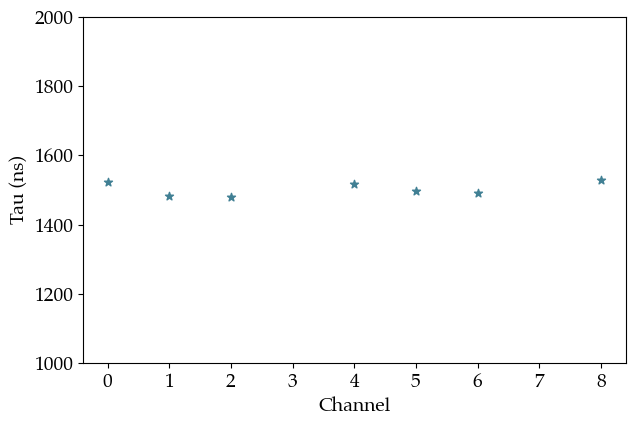

In [32]:
fig = plt.figure(figsize=(7, 4.5))
plt.scatter(all_decay_const.keys(), all_decay_const.values(), c=fav_col, marker='*')
plt.xlabel('Channel')
plt.ylabel('Tau (ns)')
plt.ylim(1000, 2000)
plt.show()

### Channels 3 and 7:

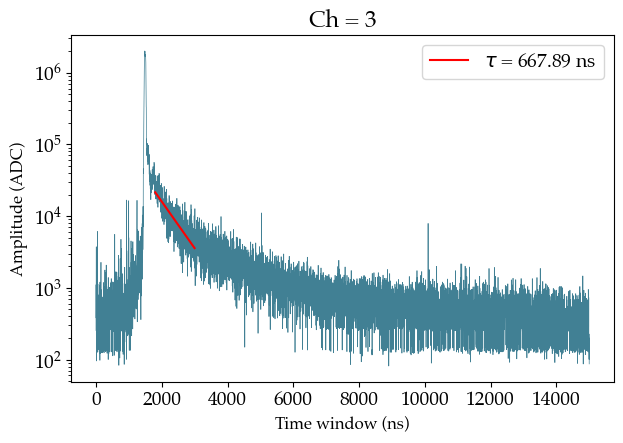

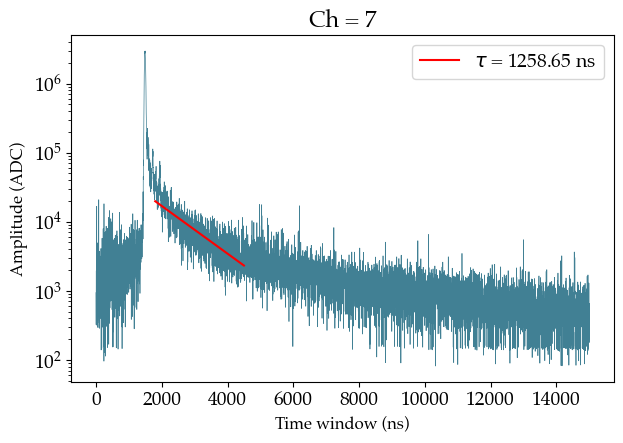

In [33]:
all_decay_const = {}

for ch,rngs in zip([3, 7], [(1800, 3000), (1800, 4500)]):
    unique_tstamps, sum_ampl = uniq_ts[ch], sum_ampls[ch]
    sel_rng      = (unique_tstamps > rngs[0]) & (unique_tstamps < rngs[1])
    sum_ampl_log = np.log(sum_ampl)
    slope, intercept, _, _, _ = linregress(unique_tstamps[sel_rng], sum_ampl_log[sel_rng])
    tau = -1 / slope
    
    fig = plt.figure(figsize=(7, 4.5))
    plt.plot(unique_tstamps, sum_ampl, lw=0.5, c=fav_col)
    plt.semilogy(unique_tstamps[sel_rng], np.exp(intercept + slope * unique_tstamps[sel_rng]), c='r', label=rf'$\tau$ = {tau:.2f} ns')
    plt.title(f'Ch = {ch}')
    plt.xlabel('Time window (ns)', fontsize=12)
    plt.ylabel('Amplitude (ADC)',  fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.show()

    all_decay_const[ch] = tau

## All non-trigger channels

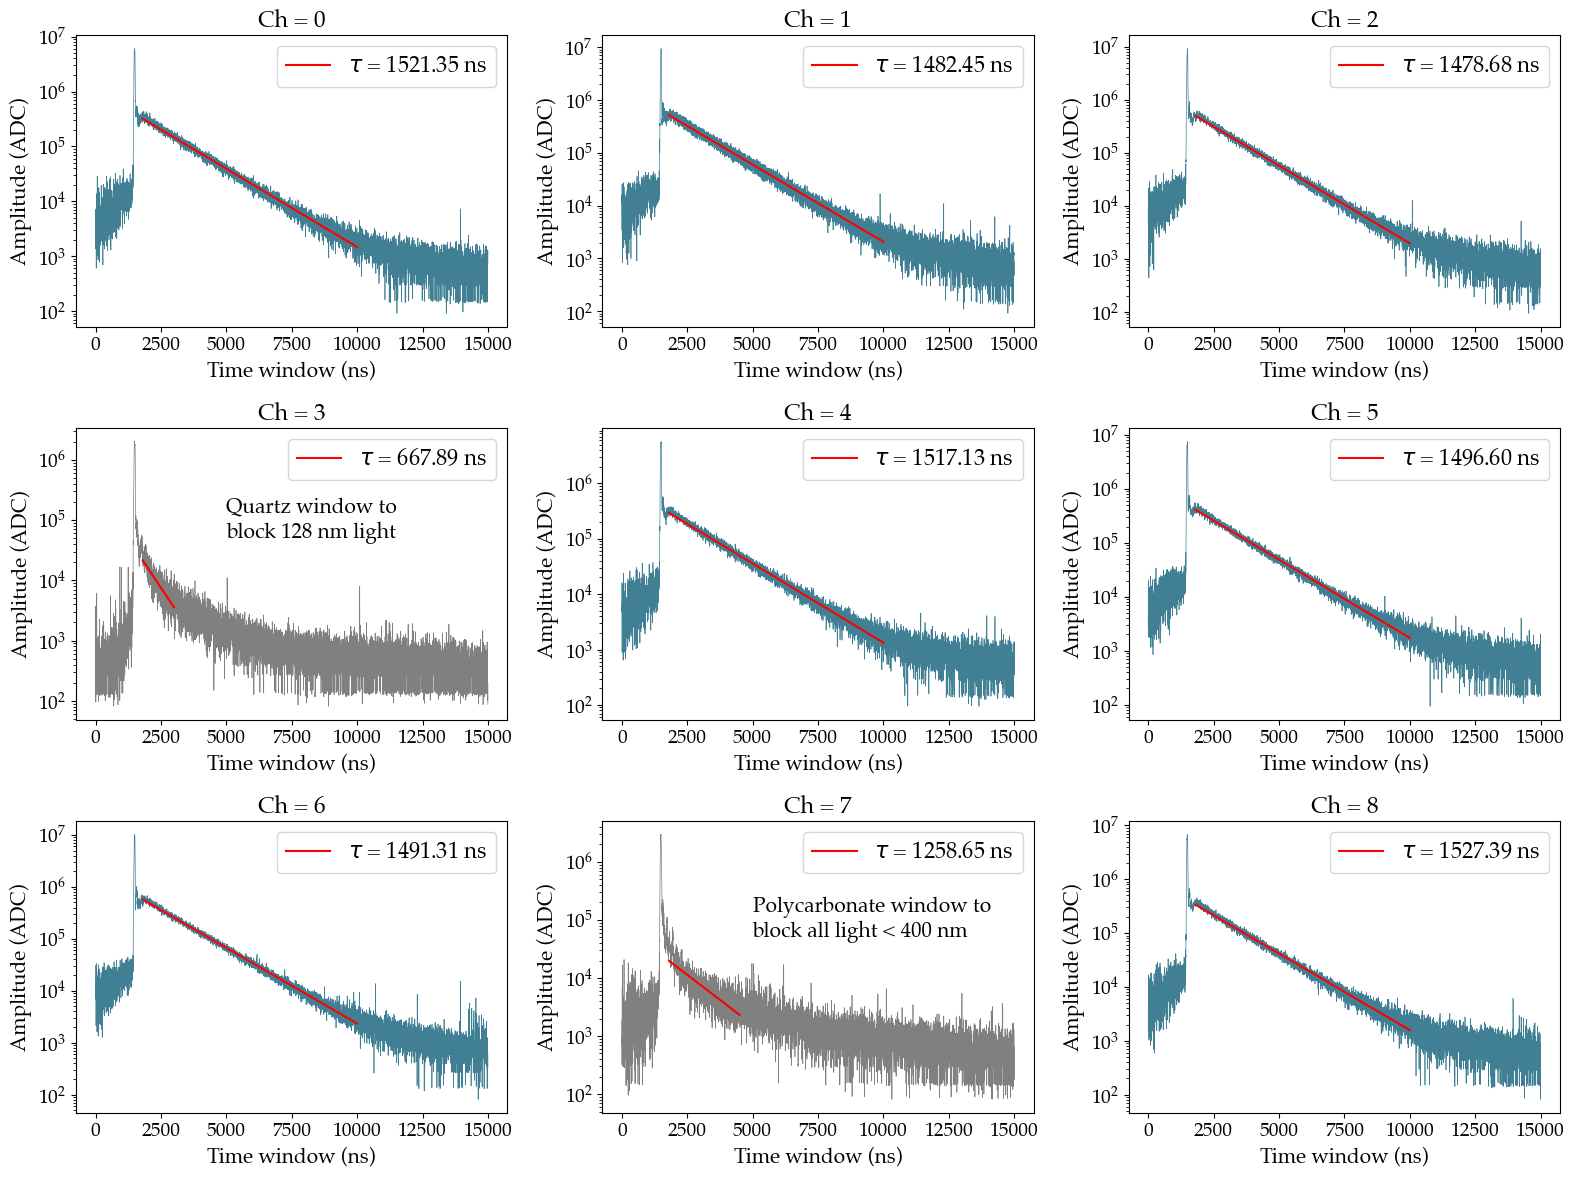

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for ch in normal_chs:
    i = int(ch/3)
    j = ch%3
    
    if ch not in [3, 7]:
        rngs  = (1800, 10000)
        col   = fav_col
        wtext = ''
    elif ch == 3:
        rngs  = (1800, 3000)
        col   = 'grey'
        wtext = 'Quartz window to \nblock 128 nm light'
    else:
        rngs  = (1800, 4500)
        col   = 'grey'
        wtext = 'Polycarbonate window to \nblock all light < 400 nm'

    unique_tstamps, sum_ampl = uniq_ts[ch], sum_ampls[ch]
    sel_rng      = (unique_tstamps > rngs[0]) & (unique_tstamps < rngs[1])
    sum_ampl_log = np.log(sum_ampl)
    slope, intercept, _, _, _ = linregress(unique_tstamps[sel_rng], sum_ampl_log[sel_rng])
    tau = -1 / slope
    
    axs[i][j].plot(unique_tstamps, sum_ampl, lw=0.5, c=col)
    axs[i][j].semilogy(unique_tstamps[sel_rng], np.exp(intercept + slope * unique_tstamps[sel_rng]), c='r', label=rf'$\tau$ = {tau:.2f} ns')
    axs[i][j].set_title(f'Ch = {ch}')
    axs[i][j].set_xlabel('Time window (ns)', fontsize=15)
    axs[i][j].set_ylabel('Amplitude (ADC)',  fontsize=15)
    axs[i][j].set_yscale('log')
    axs[i][j].legend(fontsize=16)
    all_decay_const[ch] = tau
    axs[i][j].text(5000, 5e4, wtext, fontsize=15)

plt.tight_layout()
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/images_run4/Fit_tdist_10files_May.pdf', bbox_inches='tight')
plt.show()

## Trigger SiPMs:

In [35]:
sel_dates = idx_max_trigg.keys()
uniq_ts_trigg   = {}
sum_ampls_trigg = {}
for ch in trigger_chs:
    print(ch)
    uniq_ts_ch, sum_ampls_ch = get_t_dist_from_hit_map(2*np.concatenate([idx_max_trigg  [date][ch] for date in sel_dates]),
                                                         np.concatenate([height_sg_trigg[date][ch] for date in sel_dates]))
    uniq_ts_trigg  [ch] = uniq_ts_ch
    sum_ampls_trigg[ch] = sum_ampls_ch

9
10
11


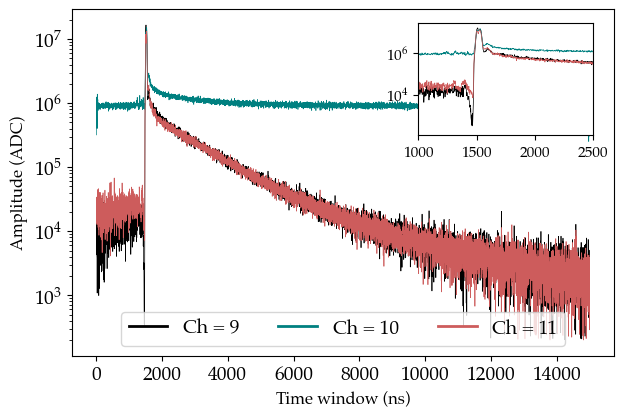

In [36]:
fig = plt.figure(figsize=(7, 4.5))
for ch, col in zip(trigger_chs, ['k', 'teal', 'indianred']):
    unique_tstamps, sum_ampl = uniq_ts_trigg[ch], sum_ampls_trigg[ch]
    plt.plot(unique_tstamps, sum_ampl, lw=0.5, c=col, label=f'Ch = {ch}')

plt.xlabel('Time window (ns)', fontsize=12)
plt.ylabel('Amplitude (ADC)',  fontsize=12)
plt.yscale('log')
#plt.ylim(8e3, 1e6)
leg = plt.legend(loc='lower center', ncol=3)
for line in leg.get_lines():
    line.set_linewidth(2)

# Inset plot
ax_inset = fig.add_axes([0.62, 0.60, 0.25, 0.25])
for ch, col in zip(trigger_chs, ['k', 'teal', 'indianred']):
    unique_tstamps, sum_ampl = uniq_ts_trigg[ch], sum_ampls_trigg[ch]
    ax_inset.plot(unique_tstamps, sum_ampl, c=col, lw=0.5)

ax_inset.set_xlim(1000, 2500)
#ax_inset.set_ylim(8e3, 1e6)
ax_inset.tick_params(axis='x', labelsize=11)
ax_inset.tick_params(axis='y', labelsize=11)
ax_inset.set_yscale('log')
plt.show()

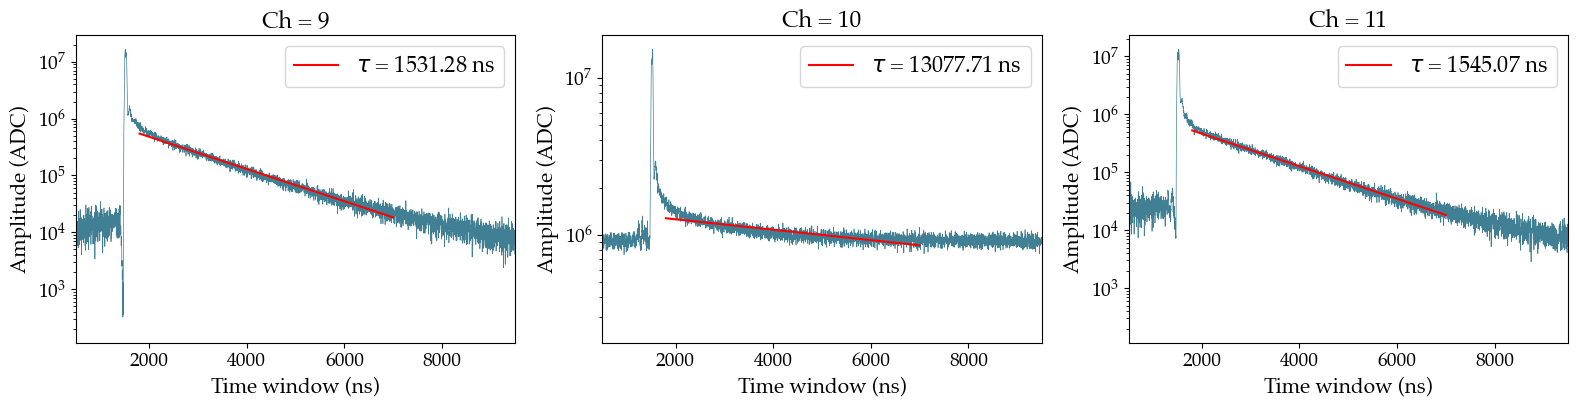

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4.3))
for ch in trigger_chs:
    i = ch%3
    
    rngs  = (1800, 7000)
    unique_tstamps, sum_ampl = uniq_ts_trigg[ch], sum_ampls_trigg[ch]
    sel_rng      = (unique_tstamps > rngs[0]) & (unique_tstamps < rngs[1])
    sum_ampl_log = np.log(sum_ampl)
    slope, intercept, _, _, _ = linregress(unique_tstamps[sel_rng], sum_ampl_log[sel_rng])
    tau = -1 / slope
    
    axs[i].plot(unique_tstamps, sum_ampl, lw=0.5, c=fav_col)
    axs[i].semilogy(unique_tstamps[sel_rng], np.exp(intercept + slope * unique_tstamps[sel_rng]), c='r', label=rf'$\tau$ = {tau:.2f} ns')
    axs[i].set_title(f'Ch = {ch}')
    axs[i].set_xlabel('Time window (ns)', fontsize=15)
    axs[i].set_ylabel('Amplitude (ADC)',  fontsize=15)
    axs[i].set_yscale('log')
    axs[i].set_xlim(500, 9500)
    axs[i].legend(fontsize=16)
    all_decay_const[ch] = tau

plt.tight_layout()
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/.pdf', bbox_inches='tight')
plt.show()

### Events with less than 10 peaks

In [38]:
sel_dates = idx_max_trigg2.keys()
uniq_ts_trigg2   = {}
sum_ampls_trigg2 = {}
for ch in trigger_chs:
    print(ch)
    uniq_ts_ch, sum_ampls_ch = get_t_dist_from_hit_map(2*np.concatenate([idx_max_trigg2  [date][ch] for date in sel_dates]),
                                                         np.concatenate([height_sg_trigg2[date][ch] for date in sel_dates]))
    uniq_ts_trigg2  [ch] = uniq_ts_ch
    sum_ampls_trigg2[ch] = sum_ampls_ch

9
10
11


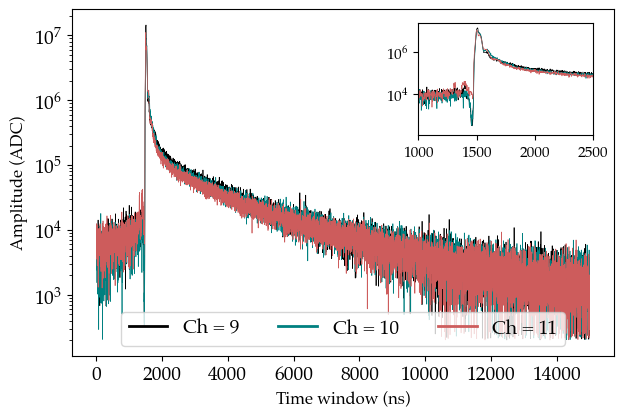

In [39]:
fig = plt.figure(figsize=(7, 4.5))
for ch, col in zip(trigger_chs, ['k', 'teal', 'indianred']):
    unique_tstamps, sum_ampl = uniq_ts_trigg2[ch], sum_ampls_trigg2[ch]
    plt.plot(unique_tstamps, sum_ampl, lw=0.5, c=col, label=f'Ch = {ch}')

plt.xlabel('Time window (ns)', fontsize=12)
plt.ylabel('Amplitude (ADC)',  fontsize=12)
plt.yscale('log')
#plt.ylim(8e3, 1e6)
leg = plt.legend(loc='lower center', ncol=3)
for line in leg.get_lines():
    line.set_linewidth(2)

# Inset plot
ax_inset = fig.add_axes([0.62, 0.60, 0.25, 0.25])
for ch, col in zip(trigger_chs, ['k', 'teal', 'indianred']):
    unique_tstamps, sum_ampl = uniq_ts_trigg2[ch], sum_ampls_trigg2[ch]
    ax_inset.plot(unique_tstamps, sum_ampl, c=col, lw=0.5)

ax_inset.set_xlim(1000, 2500)
#ax_inset.set_ylim(8e3, 1e6)
ax_inset.tick_params(axis='x', labelsize=11)
ax_inset.tick_params(axis='y', labelsize=11)
ax_inset.set_yscale('log')
plt.show()

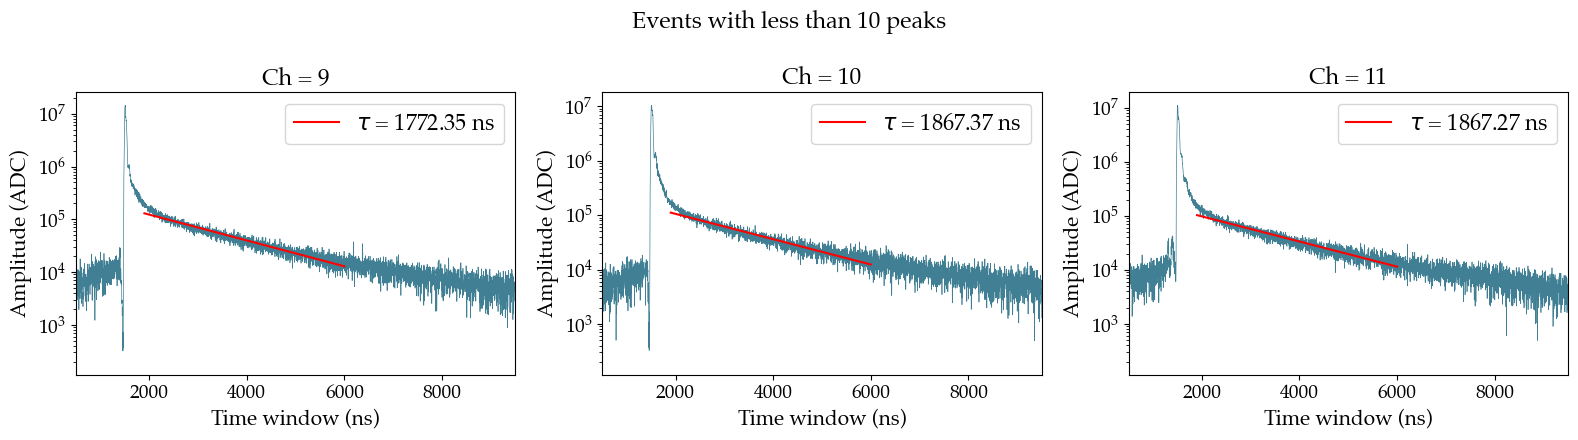

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4.5))
for ch in trigger_chs:
    i = ch%3
    
    rngs  = (1900, 6000)
    unique_tstamps, sum_ampl = uniq_ts_trigg2[ch], sum_ampls_trigg2[ch]
    sel_rng      = (unique_tstamps > rngs[0]) & (unique_tstamps < rngs[1])
    sum_ampl_log = np.log(sum_ampl)
    slope, intercept, _, _, _ = linregress(unique_tstamps[sel_rng], sum_ampl_log[sel_rng])
    tau = -1 / slope
    
    axs[i].plot(unique_tstamps, sum_ampl, lw=0.5, c=fav_col)
    axs[i].semilogy(unique_tstamps[sel_rng], np.exp(intercept + slope * unique_tstamps[sel_rng]), c='r', label=rf'$\tau$ = {tau:.2f} ns')
    axs[i].set_title(f'Ch = {ch}')
    axs[i].set_xlabel('Time window (ns)', fontsize=15)
    axs[i].set_ylabel('Amplitude (ADC)',  fontsize=15)
    axs[i].set_yscale('log')
    axs[i].set_xlim(500, 9500)
    axs[i].legend(fontsize=16)
    all_decay_const[ch] = tau

plt.suptitle('Events with less than 10 peaks')
plt.tight_layout()
#plt.savefig('/Users/romoluque_c/Repositories/BACON_romo/analysis_documentation_run3/images/.pdf', bbox_inches='tight')
plt.show()

## PMT

In [41]:
files3        = glob.glob(evts_path + 'BACoN_pmt_analysis_heights_run-*.npz')
sorted_files3 = sorted(files3, key=extract_date_obj_and_number)

idx_peaks_pmt = {}
h_peaks_pmt   = {}

for filename in sorted_files3:
    d          = np.load(filename, allow_pickle=True)
    date, fnum = extract_date_and_number(filename)
    
    if date not in idx_peaks_pmt:
        print(date)
        idx_peaks_pmt[date] = np.concatenate(d['idx_peaks_pmt'])
        h_peaks_pmt  [date] = np.concatenate(d['h_peaks_pmt'])
    else:
        try:
            idx_peaks_pmt[date] = np.concatenate((idx_peaks_pmt[date], np.concatenate(d['idx_peaks_pmt'])))
            h_peaks_pmt  [date] = np.concatenate((h_peaks_pmt  [date], np.concatenate(d['h_peaks_pmt'])))
        except Exception as e:
                print(date, fnum, filename, ch, str(e))
                continue
                
end_time     = time.time()                
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} s, {elapsed_time/60} min")

05_19_2025
Elapsed time: 136.72860503196716 s, 2.2788100838661194 min


In [42]:
uniq_ts_pmt, sum_ampls_pmt = get_t_dist_from_hit_map(2*np.concatenate([idx_peaks_pmt[date] for date in idx_peaks_pmt.keys()]),
                                                       np.concatenate([h_peaks_pmt  [date] for date in h_peaks_pmt  .keys()]))

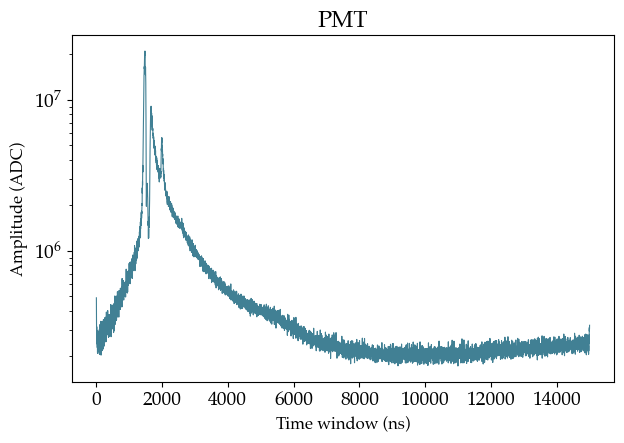

In [43]:
fig = plt.figure(figsize=(7, 4.5))
plt.plot(uniq_ts_pmt, sum_ampls_pmt, lw=0.8, c=fav_col)
plt.title('PMT')
plt.xlabel('Time window (ns)', fontsize=12)
plt.ylabel('Amplitude (ADC)',  fontsize=12)
plt.yscale('log')
plt.show()

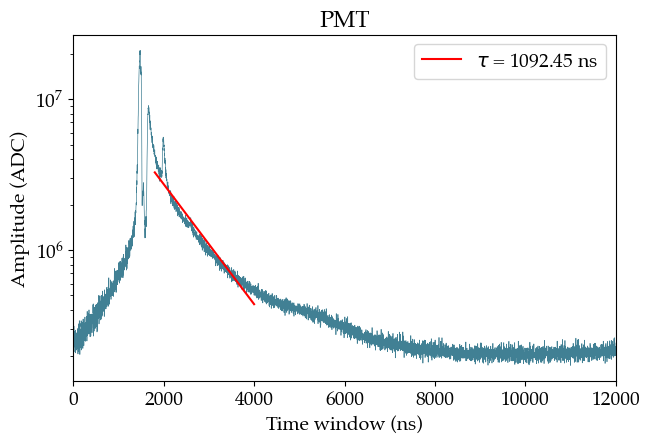

In [44]:
rngs  = (1800, 4000)

sel_rng      = (uniq_ts_pmt > rngs[0]) & (uniq_ts_pmt < rngs[1])
sum_ampl_log = np.log(sum_ampls_pmt)
slope, intercept, _, _, _ = linregress(uniq_ts_pmt[sel_rng], sum_ampl_log[sel_rng])
tau = -1 / slope

fig = plt.figure(figsize=(7, 4.5))
plt.plot(uniq_ts_pmt, sum_ampls_pmt, lw=0.5, c=fav_col)
plt.semilogy(uniq_ts_pmt[sel_rng], np.exp(intercept + slope * uniq_ts_pmt[sel_rng]), label=rf'$\tau$ = {tau:.2f} ns', c='r')
plt.title(f'PMT')
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)',  fontsize=14)
plt.yscale('log')
plt.legend()
plt.xlim(0, 12000)
plt.show()